In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
import scipy.stats as stats

In [ ]:
daily_activity= pd.read_csv('/content/Fitness Project Data/dailyActivity_merged.csv')
daily_steps= pd.read_csv('/content/Fitness Project Data/dailySteps_merged.csv')
daily_calories= pd.read_csv('/content/Fitness Project Data/dailyCalories_merged.csv')
daily_sleep= pd.read_csv('/content/Fitness Project Data/sleepDay_merged.csv')


In [ ]:
daily_steps.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [ ]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


# Data Cleaning

## Check number of Unique Users (How many users are there?)

In [ ]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [ ]:
daily_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [ ]:
daily_sleep.head()


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [ ]:
# Check unique users id
print("daily_activity: ", daily_activity["Id"].nunique())  # 33 Users
print("daily_calories: ", daily_calories["Id"].nunique())  # 33 Users
print("daily_steps: ", daily_steps["Id"].nunique())  # 33 Users
print("daily_sleep: ", daily_sleep["Id"].nunique())  # 24 Users

daily_activity:  33
daily_calories:  33
daily_steps:  33
daily_sleep:  24


In [ ]:
# Check for duplicates
print("daily_activity: ", daily_activity.duplicated().sum())  # 0
print("daily_calories: ", daily_calories.duplicated().sum())  # 0
print("daily_steps: ", daily_steps.duplicated().sum())  # 0
print("daily_sleep: ", daily_sleep.duplicated().sum())  # 3


daily_activity:  0
daily_calories:  0
daily_steps:  0
daily_sleep:  3


In [ ]:
# Remove duplicates in daily_sleep dataset
daily_sleep.drop_duplicates(inplace=True)
print("daily_sleep: ", daily_sleep.duplicated().sum())  # 0

daily_sleep:  0


In [ ]:
# check null values
print("daily_activity: ", daily_activity.isnull().sum())
# print("daily_calories: ",daily_calories.isnull().sum())
# print("daily_steps: ",daily_steps.isnull().sum())
# print("daily_sleep: ",daily_sleep.isnull().sum())

daily_activity:  Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [ ]:
daily_activity.head()
#daily_activity.shape

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


## Rename columns for consistency

In [ ]:
# Change all columns to lowercase
daily_activity.columns = daily_activity.columns.str.lower()
daily_calories.columns = daily_calories.columns.str.lower()
daily_steps.columns = daily_steps.columns.str.lower()
daily_sleep.columns = daily_sleep.columns.str.lower()
daily_calories.head()  # Check one of the tables

,id,activityday,calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [ ]:
daily_activity.rename(columns= {"activitydate": "activity_date", "totalsteps": "total_steps", "totaldistance": "total_distance", "trackerdistance": "tracker_distance",
                                "loggedactivitiesdistance": "logged_activities_distance", 	"veryactivedistance": "very_active_distance", 	"moderatelyactivedistance": "moderately_active_distance",
                                "lightactivedistance":  "light_active_distance","sedentaryactivedistance": "sedentary_active_distance",		"veryactiveminutes": "very_active_minutes",	"fairlyactiveminutes": "fairly_active_minutes",
                                	"lightlyactiveminutes": "lightly_active_minutes",	"sedentaryminutes": "sedentary_minutes"}, inplace= True)

In [ ]:

daily_calories.rename(columns= {"activityday": "activity_day"}, inplace = True)

In [ ]:
daily_steps.rename(columns= {"activityday": "activity_day", "steptotal": "step_total"}, inplace = True)

In [ ]:
daily_sleep.rename(columns= {"sleepday": "sleep_day", "totalsleeprecords": "total_sleep_records", "totalminutesasleep": "total_minutes_asleep", "totaltimeinbed": "total_time_in_bed"}, inplace = True)

In [ ]:
# make all daily_activity date format consistent
daily_activity["activity_date"] = pd.to_datetime(daily_activity["activity_date"], format="%m/%d/%Y")
daily_calories["activity_day"] = pd.to_datetime(daily_calories["activity_day"], format="%m/%d/%Y")
daily_steps["activity_day"] = pd.to_datetime(daily_steps["activity_day"], format="%m/%d/%Y")
daily_sleep["sleep_day"] = pd.to_datetime(daily_sleep["sleep_day"], format="%m/%d/%Y %I:%M:%S %p")

## Merge `daily activity`, `daily calories`, and `daily sleep`

In [ ]:
daily_activity_calories = pd.merge(daily_activity, daily_calories, left_on=["id", "activity_date"],
                                   right_on=["id", "activity_day"], how="left")
daily_activity_calories.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories_x,activity_day,calories_y
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,2016-04-12,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2016-04-13,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,2016-04-14,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,2016-04-15,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2016-04-16,1863


In [ ]:
daily_activity_calories = pd.merge(daily_activity_calories, daily_sleep, left_on=["id", "activity_date"],
                                   right_on=["id","sleep_day"], how="left")
daily_activity_calories.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories_x,activity_day,calories_y,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,13,328,728,1985,2016-04-12,1985,2016-04-12,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,19,217,776,1797,2016-04-13,1797,2016-04-13,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,11,181,1218,1776,2016-04-14,1776,NaT,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,34,209,726,1745,2016-04-15,1745,2016-04-15,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,10,221,773,1863,2016-04-16,1863,2016-04-16,2.0,340.0,367.0


In [ ]:
daily_activity_calories.isna().sum()

,0
id,0
activity_date,0
total_steps,0
total_distance,0
tracker_distance,0
logged_activities_distance,0
very_active_distance,0
moderately_active_distance,0
light_active_distance,0
sedentary_active_distance,0


In [ ]:
# Fill NaN values with the mean of the column
daily_activity_calories['sleep_day'].fillna(daily_activity_calories['sleep_day'].mean(), inplace=True)
daily_activity_calories['total_sleep_records'].fillna(daily_activity_calories['total_sleep_records'].mean(), inplace=True)
daily_activity_calories['total_minutes_asleep'].fillna(daily_activity_calories['total_minutes_asleep'].mean(), inplace=True)
daily_activity_calories['total_time_in_bed'].fillna(daily_activity_calories['total_time_in_bed'].mean(), inplace=True)

<ipython-input-146-784bb6d5c0be>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  daily_activity_calories['sleep_day'].fillna(daily_activity_calories['sleep_day'].mean(), inplace=True)
<ipython-input-146-784bb6d5c0be>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

# Exploratory Data Analysis (EDA)

## Activity vs Calory

In [ ]:
daily_activity_calories.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories_x',
       'activity_day', 'calories_y', 'sleep_day', 'total_sleep_records',
       'total_minutes_asleep', 'total_time_in_bed'],
      dtype='object')

### Calculate the correlation between total steps or very active minutes and calories burnt. This can provide insights into how activity levels influence caloric burn.

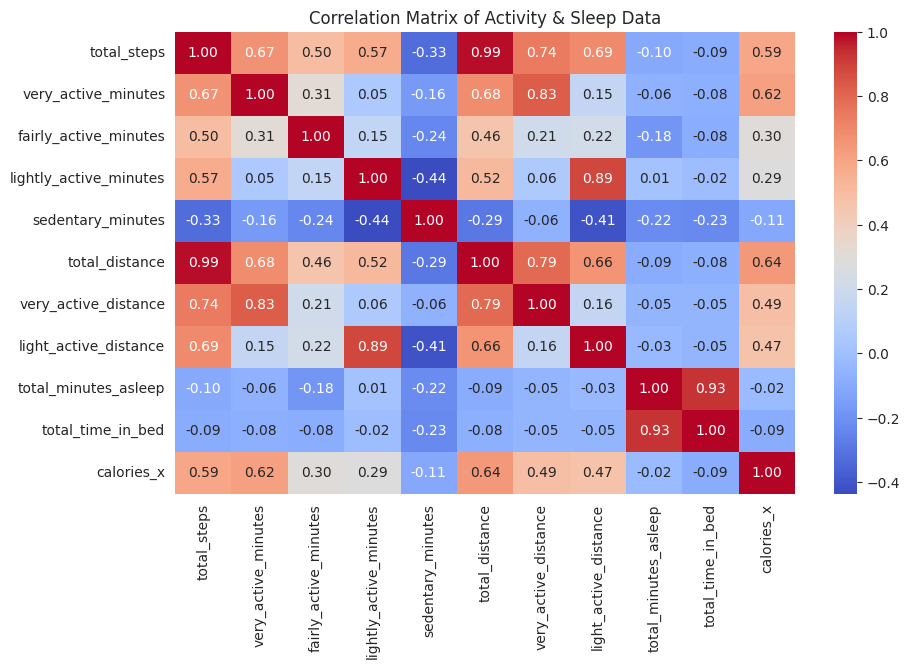

In [ ]:
# Correlation matrix
corr_matrix = daily_activity_calories[ [ 'total_steps', 'very_active_minutes', 'fairly_active_minutes',
    'lightly_active_minutes', 'sedentary_minutes',
    'total_distance', 'very_active_distance', 'light_active_distance',
    'total_minutes_asleep', 'total_time_in_bed',
    'calories_x']].corr()

# Heatmap for better visuals
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Activity & Sleep Data")
plt.show()

In [ ]:
# Calculate the correlation between total steps and calories burnt
correlation_steps_calories = daily_activity_calories["total_steps"].corr(daily_activity_calories["calories_y"])
# Calculate the correlation between very active minutes and calories burnt
correlation_active_minutes_calories = daily_activity_calories["very_active_minutes"].corr(daily_activity_calories["calories_y"])

print("Correlation between total steps and calories burnt:", correlation_steps_calories)
print("Correlation between very active minutes and calories burnt:", correlation_active_minutes_calories)

Correlation between total steps and calories burnt: 0.5915680862453355
Correlation between very active minutes and calories burnt: 0.6158382682703384


* Both steps taken and very active minutes have a positive correlation with calories burnt, meaning as they increase, caloric burn tends to increase as well.

* The intensity of activity (very active minutes) has a slightly stronger correlation with caloric burn than just the number of steps.

* While these metrics provide insight into caloric burn, they don't capture the full picture. Other factors, like individual physiology and activities not measured by the device, also influence calories burnt.





## Sedentary Behavior Impact

### Analyze how sedentary minutes influence calories burnt. It would be interesting to see if longer sedentary periods significantly decrease daily caloric burn.

In [ ]:
# Descriptive Statistics of sedentary minutes
daily_activity_calories["sedentary_minutes"].describe()

,sedentary_minutes
count,940.000000
mean,991.210638
std,301.267437
min,0.000000
25%,729.750000
50%,1057.500000
75%,1229.500000
max,1440.000000


* Mean: On average, users are sedentary for about 991.2 minutes (or roughly 16.5 hours) a day.

* Standard Deviation: The standard deviation is about 301.3 minutes, indicating there's a variability of around 5 hours in sedentary behavior among the users.

* Min and Max: The range of sedentary minutes is from 0 to 1440 minutes (24 hours). This means that on some days, certain users were not sedentary at all, while on other days, some users were sedentary the entire day.
* Quartiles:

    * 25% of the data (1st quartile) have sedentary minutes below 729.75 minutes (or about 12.2 hours).

    * The median (50% or 2nd quartile) is 1057.5 minutes, meaning half of the users have sedentary periods of about 17.6 hours or more per day.

    * 75% of the data (3rd quartile) have sedentary minutes below 1229.5 minutes (or about 20.5 hours).

* From these statistics, we can conclude that a significant portion of users days is sedentary. The majority of users (as indicated by the median) are sedentary for more than 17 hours a day.





In [ ]:
correlation_sedentary_calories = daily_activity_calories["sedentary_minutes"].corr(daily_activity_calories["calories_y"])
print("Correlation between sedentary minutes and calories burnt:", correlation_sedentary_calories)

Correlation between sedentary minutes and calories burnt: -0.10697304768018764


* The negative value indicates that as the sedentary minutes increase, the calories burned tend to decrease, and vice versa.

Text(0.5, 1.0, 'Scatter Plot of Sedentary Minutes vs. Calories Burnt')

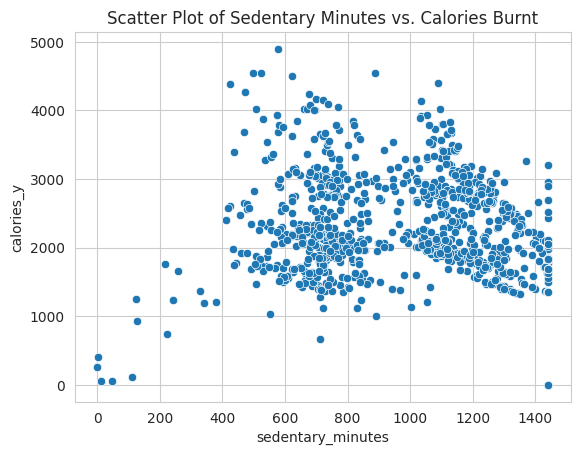

In [ ]:
# scatter plot sedentary minutes vs. calories
scatteer_plot = sns.scatterplot( data=daily_activity_calories, x="sedentary_minutes", y="calories_y")
scatteer_plot.set_title("Scatter Plot of Sedentary Minutes vs. Calories Burnt")

Given the scatter plot observation and the correlation coefficient:

**No Strong Positive or Negative Correlation**: There doesn't seem to be a clear linear relationship between sedentary minutes and calories burned. The points are scattered with no obvious upward or downward trend. This suggests that the more time someone spends sedentary, it doesn't directly predict the number of calories they burn.

**Clustered Distribution**: Most of the data points are grouped within a specific range of sedentary minutes (around 0 to 1200 minutes), but there are some outliers or extreme values, especially with low sedentary minutes and very high calories burned.

**Possible Outliers**: Some points show lower sedentary minutes but higher calories burned, which could indicate outliers or special cases where people may have higher energy expenditure despite being sedentary for less time.

In summary, the plot suggests that sedentary minutes might not be a strong predictor of calories burned, or that other factors could be at play influencing the calories burned. More analysis might be needed to explore this relationship further.


## User Segmentation

* Divide the data into segments based on sedentary behavior. For example:
    - Low sedentary: Less than 4 hours.
    - Moderate sedentary: 4-8 hours.
    - High sedentary: More than 8 hours.

In [ ]:
def sedentary_segment(minutes):
  if minutes < 4*60:
    return "Low sedentary"
  elif 4*60 <= minutes <= 8*60:
    return"Moderate sedentary"
  else:
    return "High sedentary"
daily_activity_calories["Sedentary_Segment"] = daily_activity_calories["sedentary_minutes"].apply(sedentary_segment)
average_caloric_burn_per_segment = daily_activity_calories.groupby("Sedentary_Segment")["calories_y"].mean().rename('Average Caloric Burn').reset_index()
print(average_caloric_burn_per_segment)


    Sedentary_Segment  Average Caloric Burn
0      High sedentary           2318.840659
1       Low sedentary            618.777778
2  Moderate sedentary           2365.666667


**Moderate and High Sedentary Groups**: Interestingly, both the Moderate and High sedentary groups are burning more calories on average (around 2300 calories) than the Low sedentary group, which is burning around 618 calories. This could suggest that people with higher sedentary time are still engaging in some form of activity or other factors influencing their calorie burn, or that there are outliers in the data.

**Low Sedentary Group**: The Low sedentary group, despite spending less time sedentary, burns significantly fewer calories on average. This could be due to the fact that these individuals are likely engaging in more physical activity, but their total calories burned still doesn't match the higher sedentary groups, possibly due to varying levels of other activities.

**Potential Data Limitations**: It's essential to consider potential data limitations or biases. For instance, the device might not capture all types of activities equally, or there might be external factors not accounted for in the data that influence caloric burn.

In summary, while sedentary behavior is an important aspect to consider, the data suggests that other factors, possibly including bursts of intense activity or individual metabolic rates, play a more crucial role in determining daily caloric burn. It emphasizes the importance of considering the entire activity profile of an individual rather than focusing solely on sedentary periods.

## Segmentation based on daily steps

In [ ]:
daily_avg = daily_activity_calories.groupby('id').agg(
    {'total_steps': 'mean',
    'calories_y': 'mean',
    'total_minutes_asleep': 'mean'}
)
# Rename columns for clarity
daily_avg.columns = ['mean_daily_steps', 'mean_daily_calories', 'mean_daily_sleep']

daily_avg.head()


,mean_daily_steps,mean_daily_calories,mean_daily_sleep
id,,,
1503960366,12116.741935,1816.419355,371.678678
1624580081,5743.903226,1483.354839,419.173171
1644430081,7282.966667,2811.300000,402.483415
1844505072,2580.064516,1573.483871,441.704799
1927972279,916.129032,2172.806452,418.822659


In [ ]:
daily_activity_calories.head(3)

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,lightly_active_minutes,sedentary_minutes,calories_x,activity_day,calories_y,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,Sedentary_Segment
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,328,728,1985,2016-04-12,1985,2016-04-12 00:00:00.000000000,1.000000,327.000000,346.000000,High sedentary
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,217,776,1797,2016-04-13,1797,2016-04-13 00:00:00.000000000,2.000000,384.000000,407.000000,High sedentary
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,181,1218,1776,2016-04-14,1776,2016-04-26 11:38:55.609756160,1.119512,419.173171,458.482927,High sedentary


In [ ]:
# Define a function to categorize users based on their average daily steps

def classify_by_steps(average_steps):
  if average_steps < 5000:
    return 'Sedentary'
  elif 5000 <= average_steps < 7500:
    return "Moderately Active"
  elif 7500 <= average_steps < 10000:
    return "Active"
  else:
    return "Very Active"

# Apply the function to the 'mean_daily_steps' column to create a new 'activity_category' column
daily_avg['activity_category']= daily_avg['mean_daily_steps'].apply(classify_by_steps)

# Display the updated dataframe with the new 'Activity_Category' column
daily_avg.head()


,mean_daily_steps,mean_daily_calories,mean_daily_sleep,activity_category
id,,,,
1503960366,12116.741935,1816.419355,371.678678,Very Active
1624580081,5743.903226,1483.354839,419.173171,Moderately Active
1644430081,7282.966667,2811.300000,402.483415,Moderately Active
1844505072,2580.064516,1573.483871,441.704799,Sedentary
1927972279,916.129032,2172.806452,418.822659,Sedentary


In [ ]:
# group by percentage:

# Group by 'Activity_Category' and count each group
user_type_percent = daily_avg.groupby('activity_category').size().reset_index(name='total')

# Calculate the total number of users
user_type_percent['totals'] = user_type_percent['total'].sum()

# Calculate the percentage for each user type
user_type_percent['total_percent'] = user_type_percent['total'] / user_type_percent['totals']

# Convert the percentage to a readable format
user_type_percent['percentage'] = user_type_percent['total_percent'].apply(lambda x: f"{x*100:.2f}%")

# Reorder the levels of the user type
ordered_categories = ["Very Active", "Active", "Moderately Active", "Sedentary"]
user_type_percent['activity_category'] = pd.Categorical(user_type_percent['activity_category'], categories=ordered_categories, ordered=True)
user_type_percent = user_type_percent.sort_values('activity_category')

user_type_percent

,activity_category,total,totals,total_percent,percentage
3,Very Active,7,33,0.212121,21.21%
0,Active,9,33,0.272727,27.27%
1,Moderately Active,9,33,0.272727,27.27%
2,Sedentary,8,33,0.242424,24.24%


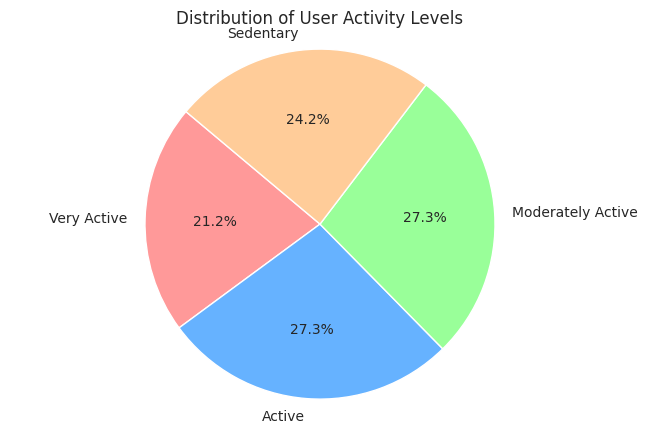

In [ ]:
# draw a bar graph for each category

# Data for the pie chart
labels = user_type_percent["activity_category"]
sizes = user_type_percent["total_percent"]

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#ff9999", "#66b2ff", "#99ff99", "#ffcc99"],
)
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of User Activity Levels")
plt.show()

#### Based on the provided results, here are some conclusions we can draw:

**Distribution of User Activity Levels**:
- The largest portion of users, 27.3%, are classified as `"Active"`, followed closely by `"Sedentary"` at 24.2%.

- `"Moderately Active"` and `"Very Active"` categories have almost equal shares, with 21.2% and 27.3%, respectively.

**Activity Insights**:
- A significant proportion of users are either `"Active"` or `"Sedentary"`, showing a balanced mix of users who are moderately active and users with little to no physical activity.

- `"Very Active"` users make up a substantial percentage, but they are slightly outnumbered by users who are `"Active"` or `"Sedentary"`.

**Marketing or Product Development Implications**:

- As the `"Active"` group is the largest, product features, campaigns, or strategies that encourage maintaining or improving activity levels could be more beneficial to target this segment.

- Given that `"Sedentary"` and `"Very Active"` users are on opposite ends of the spectrum, marketing could be more differentiated, catering to either motivation for those sedentary users or enhancing performance for very active users.

**User Behavior**:

- Almost a quarter of the users are `"Sedentary"`, which raises a question about how these users are interacting with the product. These users may not be using it actively for fitness, or they might be motivated to track their progress to become more active over time.

- The significant portion of `"Very Active"` users suggests that the product is effective in encouraging users who are already active to continue their routines.


### Statistical Testing



In [ ]:
# Group data by Activity_Category
groups = [
    daily_avg["mean_daily_calories"][daily_avg["activity_category"] == category]
    for category in ordered_categories
]

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

print("F statistic: ", f_statistic, "p-value: ", p_value)

F statistic:  1.7818008103594805 p-value:  0.17266337819414235


There isn't a statistically significant difference in caloric burn between the different user types based on the ANOVA test results. The differences observed in the mean caloric burn for each group could be due to random variation and not due to the group (user type) itself.

### Trend Analysis

Analyze trends over time. Do users tend to be more active (and burn more calories) on specific days of the week.

In [ ]:
daily_activity_calories.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories_x',
       'activity_day', 'calories_y', 'sleep_day', 'total_sleep_records',
       'total_minutes_asleep', 'total_time_in_bed', 'Sedentary_Segment'],
      dtype='object')

In [ ]:
daily_activity_calories['activity_day']

,activity_day
0,2016-04-12
1,2016-04-13
2,2016-04-14
3,2016-04-15
4,2016-04-16
...,...
935,2016-05-08
936,2016-05-09
937,2016-05-10
938,2016-05-11


In [ ]:
daily_avg.columns

Index(['mean_daily_steps', 'mean_daily_calories', 'mean_daily_sleep',
       'activity_category'],
      dtype='object')

In [ ]:
# merge daily_avg daily_activity_calories
daily_activity_calories_avg = pd.merge(
    daily_activity_calories, daily_avg, on="id", how="inner"
)
daily_activity_calories_avg.head()

,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,calories_y,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed,Sedentary_Segment,mean_daily_steps,mean_daily_calories,mean_daily_sleep,activity_category
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,2016-04-12 00:00:00.000000000,1.000000,327.000000,346.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,2016-04-13 00:00:00.000000000,2.000000,384.000000,407.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,1776,2016-04-26 11:38:55.609756160,1.119512,419.173171,458.482927,High sedentary,12116.741935,1816.419355,371.678678,Very Active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,2016-04-15 00:00:00.000000000,1.000000,412.000000,442.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,2016-04-16 00:00:00.000000000,2.000000,340.000000,367.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active


In [ ]:
most_active_day_mean = daily_activity_calories_avg.groupby("activity_day")["total_steps"].mean()

# Convert the DatetimeIndex to day names
most_active_day_mean_daynames = most_active_day_mean.index.day_name()

# Group by these day names and calculate the mean steps
grouped_day_mean = most_active_day_mean.groupby(most_active_day_mean_daynames).mean()

grouped_day_mean

,total_steps
activity_day,
Friday,7448.602477
Monday,7782.003273
Saturday,8131.005657
Sunday,6937.182581
Thursday,7158.832465
Tuesday,8125.930390
Wednesday,7544.715929


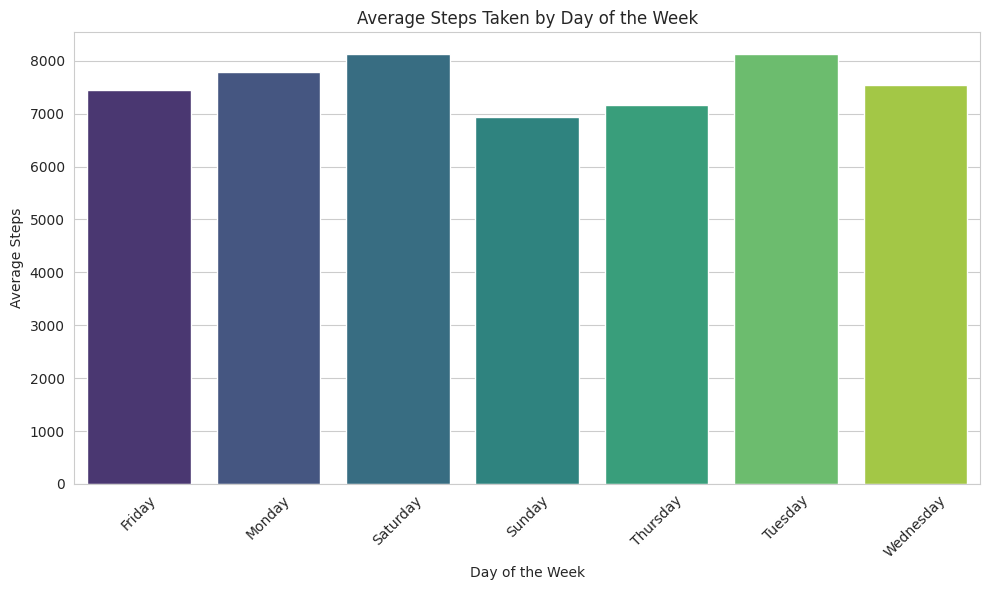

In [ ]:
# Ensure the data is sorted by the desired order of days for visual clarity
order_of_days = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

# Plotting
# Plotting the data using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x=grouped_day_mean.index,
    y=grouped_day_mean.values,
    palette="viridis",
    hue=grouped_day_mean.index,
    legend=False
)
plt.title("Average Steps Taken by Day of the Week")
plt.ylabel("Average Steps")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Users tend to be most active on weekends, particularly on Saturday. Activity starts strong at the beginning of the week with Monday and Tuesday having higher averages, but it seems to decrease slightly mid-week before picking up again towards the weekend. This kind of trend could be influenced by various factors such as work schedules, personal habits, or recreational activities that people might engage in more during weekends. This information can be useful for targeted marketing or promotional activities, where you might want to engage users more during their active periods or motivate them during typically less active days.

 ### Activity Efficiency

Calculate the "efficiency" of activity, defined as calories burnt per step or per active minute. This can provide insights into which activities or intensity levels yield the highest caloric burn.

In [ ]:
daily_activity_calories_avg.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories_x',
       'activity_day', 'calories_y', 'sleep_day', 'total_sleep_records',
       'total_minutes_asleep', 'total_time_in_bed', 'Sedentary_Segment',
       'mean_daily_steps', 'mean_daily_calories', 'mean_daily_sleep',
       'activity_category'],
      dtype='object')

In [ ]:
# efficieny (per step)
daily_activity_calories_avg["efficiency_per_step"] = (
    daily_activity_calories_avg["calories_y"]
    / daily_activity_calories_avg["total_steps"]
)
# daily_activity_calories_avg.head()
# Calories burnt per active minute:
daily_activity_calories_avg["total_active_minutes"] = (
    daily_activity_calories_avg["very_active_minutes"]
    + daily_activity_calories_avg["fairly_active_minutes"]
    + daily_activity_calories_avg["lightly_active_minutes"]
)
daily_activity_calories_avg["efficiency_per_minute"] = (
    daily_activity_calories_avg["calories_y"]
    / daily_activity_calories_avg["total_active_minutes"]
)
# print columns names
print(daily_activity_calories_avg.columns)
daily_activity_calories_avg.head()

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories_x',
       'activity_day', 'calories_y', 'sleep_day', 'total_sleep_records',
       'total_minutes_asleep', 'total_time_in_bed', 'Sedentary_Segment',
       'mean_daily_steps', 'mean_daily_calories', 'mean_daily_sleep',
       'activity_category', 'efficiency_per_step', 'total_active_minutes',
       'efficiency_per_minute'],
      dtype='object')


,id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,total_minutes_asleep,total_time_in_bed,Sedentary_Segment,mean_daily_steps,mean_daily_calories,mean_daily_sleep,activity_category,efficiency_per_step,total_active_minutes,efficiency_per_minute
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,327.000000,346.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active,0.150813,366,5.423497
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,384.000000,407.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active,0.167396,257,6.992218
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,419.173171,458.482927,High sedentary,12116.741935,1816.419355,371.678678,Very Active,0.169790,222,8.000000
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,412.000000,442.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active,0.178754,272,6.415441
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,340.000000,367.000000,High sedentary,12116.741935,1816.419355,371.678678,Very Active,0.147052,267,6.977528


In [ ]:
 # Compare efficiencies across different user categories
# (like "Very Active", "Lightly Active", etc.) to determine which user category is the most efficient.

# Group by User Category and Calculate Efficiency Metrics
# Calculate metrics for each unique user
user_avg_metrics = (
    daily_activity_calories_avg.groupby(["id", "activity_category"])
    .agg({"calories_y": "mean", "total_steps": "mean", "total_active_minutes": "mean"})
    .reset_index()
)

# Group by User Category and Calculate Efficiency Metrics
user_category_efficiency = user_avg_metrics.groupby("activity_category").agg(
    {"calories_y": "mean", "total_steps": "mean", "total_active_minutes": "mean"}
)

user_category_efficiency["efficiency_per_step"] = (
    user_category_efficiency["calories_y"] / user_category_efficiency["total_steps"]
)
user_category_efficiency["efficiency_per_minute"] = (
    user_category_efficiency["calories_y"]
    / user_category_efficiency["total_active_minutes"]
)

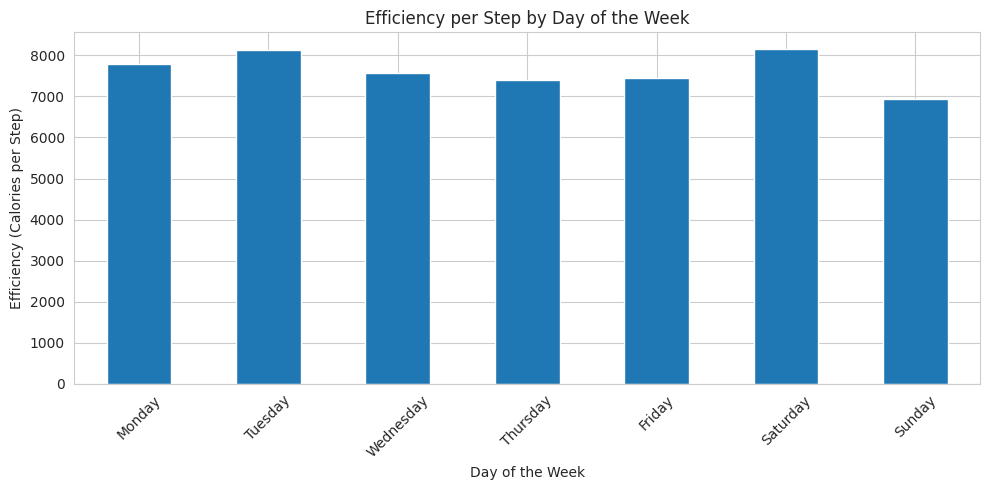

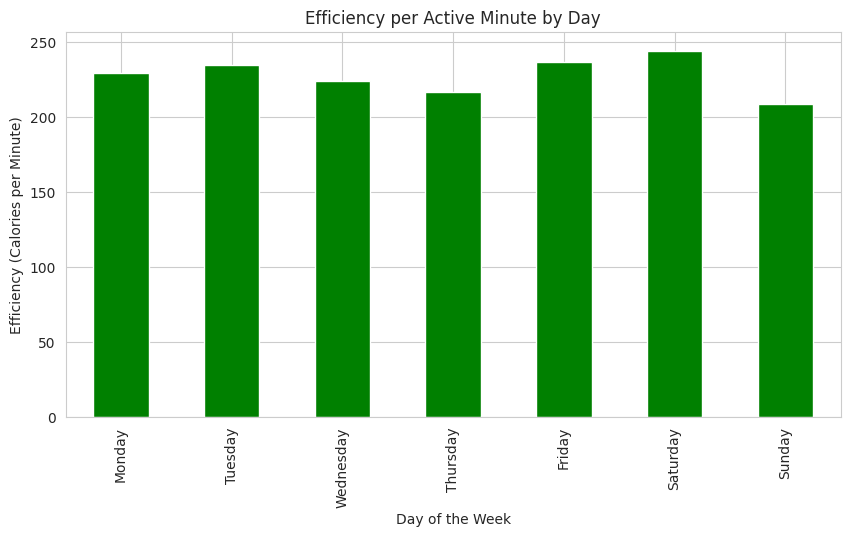

In [ ]:
# Compare efficiencies across different days to see if there are days
# when users are more efficient in their activities.
# Calculate Efficiency per Step
# Visualization

# Extract day of the week from 'activityday' and create a new column 'day_of_week'
daily_activity_calories_avg["day_of_week"] = daily_activity_calories_avg[
    "activity_day"
].dt.day_name()

# Plot Efficiency per Step
plt.figure(figsize=(10, 5))
daily_activity_calories_avg.groupby("day_of_week")[
    "total_steps"
].mean().reindex(order_of_days).plot(kind="bar")
plt.title("Efficiency per Step by Day of the Week")
plt.ylabel("Efficiency (Calories per Step)")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# # Plot Efficiency per Active Minute
plt.figure(figsize=(10, 5))
daily_activity_calories_avg.groupby("day_of_week")[
    "total_active_minutes"
].mean().reindex(order_of_days).plot(kind="bar", color="green")
plt.title("Efficiency per Active Minute by Day")
plt.ylabel("Efficiency (Calories per Minute)")
plt.xlabel("Day of the Week")
plt.show()

Efficiency per Step by Day of the Week (First Graph):

- he efficiency of calories burned per step is fairly consistent across all days of the week, with no significant variation. Monday and Saturday show slightly higher efficiency, while Sunday has the lowest. The graph indicates a balanced level of physical activity throughout the week, with no major differences in efficiency.

Efficiency per Active Minute by Day of the Week (Second Graph):

- The efficiency of calories burned per active minute is also consistent, with Friday and Saturday showing the highest efficiency. Monday, Tuesday, Wednesday, and Thursday show similar levels of efficiency, with Sunday being the least efficient. This suggests that more intense or effective activities occur on Friday and Saturday.


### Analyze why sedentary behave highest efficiency


In [ ]:
# Filter data for sedentary individuals
sedentary_data = daily_activity_calories_avg[
    daily_activity_calories_avg["activity_category"] == "Sedentary"
]

# Descriptive statistics for 'totalsteps'
steps_stats = sedentary_data["total_steps"].describe()
print("Steps Statistics for Sedentary Users:\n", steps_stats)

# Descriptive statistics for 'calories_y' (assuming 'calories_y' is the relevant column for calories)
calories_stats = sedentary_data["calories_y"].describe()
print("\nCalories Statistics for Sedentary Users:\n", calories_stats)

Steps Statistics for Sedentary Users:
 count      214.000000
mean      2842.074766
std       2793.706992
min          0.000000
25%          0.000000
50%       2252.500000
75%       4909.500000
max      11728.000000
Name: total_steps, dtype: float64

Calories Statistics for Sedentary Users:
 count     214.000000
mean     2016.560748
std       478.157775
min        57.000000
25%      1766.250000
50%      1985.500000
75%      2220.750000
max      3879.000000
Name: calories_y, dtype: float64


In [ ]:
# Descriptive statistics for 'veryactiveminutes'
very_active_minutes_stats = sedentary_data["very_active_minutes"].describe()
print(
    "Very Active Minutes Statistics for Sedentary Users:\n", very_active_minutes_stats
)

# Descriptive statistics for 'fairlyactiveminutes'
fairly_active_minutes_stats = sedentary_data["fairly_active_minutes"].describe()
print(
    "\nFairly Active Minutes Statistics for Sedentary Users:\n",
    fairly_active_minutes_stats,
)

# Descriptive statistics for 'lightlyactiveminutes'
lightly_active_minutes_stats = sedentary_data["lightly_active_minutes"].describe()
print(
    "\nLightly Active Minutes Statistics for Sedentary Users:\n",
    lightly_active_minutes_stats,
)

Very Active Minutes Statistics for Sedentary Users:
 count    214.000000
mean       3.598131
std       10.290029
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.000000
Name: very_active_minutes, dtype: float64

Fairly Active Minutes Statistics for Sedentary Users:
 count    214.000000
mean       4.074766
std       11.121777
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      113.000000
Name: fairly_active_minutes, dtype: float64

Lightly Active Minutes Statistics for Sedentary Users:
 count    214.000000
mean     111.700935
std      107.978629
min        0.000000
25%        0.000000
50%       87.000000
75%      196.000000
max      380.000000
Name: lightly_active_minutes, dtype: float64


In [ ]:
# Descriptive statistics for 'totalminutesasleep'
sleep_stats = sedentary_data["total_minutes_asleep"].describe()
print("Sleep Statistics for Sedentary Users:\n", sleep_stats)

# Descriptive statistics for 'totaltimeinbed'
time_in_bed_stats = sedentary_data["total_time_in_bed"].describe()
print("\nTime in Bed Statistics for Sedentary Users:\n", time_in_bed_stats)

Sleep Statistics for Sedentary Users:
 count    214.000000
mean     413.837144
std       69.952208
min       61.000000
25%      419.173171
50%      419.173171
75%      419.173171
max      750.000000
Name: total_minutes_asleep, dtype: float64

Time in Bed Statistics for Sedentary Users:
 count    214.000000
mean     453.247299
std       91.401281
min       69.000000
25%      458.482927
50%      458.482927
75%      458.482927
max      961.000000
Name: total_time_in_bed, dtype: float64


In [178]:
daily_activity_calories_avg.columns

Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories_x',
       'activity_day', 'calories_y', 'sleep_day', 'total_sleep_records',
       'total_minutes_asleep', 'total_time_in_bed', 'Sedentary_Segment',
       'mean_daily_steps', 'mean_daily_calories', 'mean_daily_sleep',
       'activity_category', 'efficiency_per_step', 'total_active_minutes',
       'efficiency_per_minute', 'day_of_week'],
      dtype='object')

<ipython-input-181-62270d8f9772>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


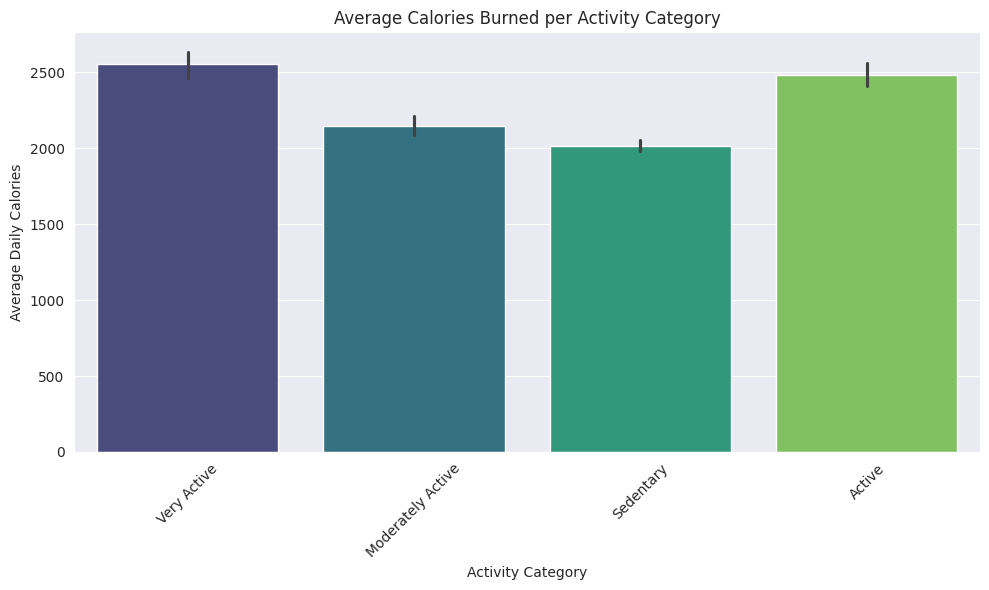

,count,mean,std,min,25%,50%,75%,max
activity_category,,,,,,,,
Active,265.0,2481.660377,607.936952,1875.677419,1982.032258,2043.444444,2965.548387,3436.580645
Moderately Active,250.0,2149.116000,486.520642,1483.354839,1788.000000,2037.677419,2599.620690,2811.300000
Sedentary,214.0,2016.560748,265.809709,1573.483871,1724.161290,2131.769231,2186.193548,2385.806452
Very Active,211.0,2554.170616,641.623456,1513.666667,1816.419355,2544.000000,3093.870968,3420.258065


In [181]:
# The average calories burned for each category of activity
plt.figure(figsize=(10, 6))
sns.barplot(
    x="activity_category",
    y="mean_daily_calories",
    data=daily_activity_calories_avg,
    palette="viridis",
)
plt.title("Average Calories Burned per Activity Category")
plt.ylabel("Average Daily Calories")
plt.xlabel("Activity Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#
daily_activity_calories_avg.groupby("activity_category")[
    "mean_daily_calories"
].describe()

 ### Caloric Goals

In [182]:
# 1. Set the caloric goal
caloric_goal = 2000

# 2. Determine days meeting the goal
daily_activity_calories_avg["meets_goal"] = (
    daily_activity_calories_avg["calories_y"] >= caloric_goal
)

# 3. Calculate the percentage
percentage_meeting_goal = (
    daily_activity_calories_avg["meets_goal"].sum() / len(daily_activity_calories_avg)
) * 100

print(
    f"The percentage of days users meet or exceed the caloric goal is: {percentage_meeting_goal:.2f}%"
)

The percentage of days users meet or exceed the caloric goal is: 60.74%


The percentage of days users meet or exceed the caloric goal is: 65.12%
Approximately 60.74% of users consistently meet or surpass the recommended daily caloric burn of 2000 calories. This suggests that a majority are actively engaging in sufficient physical activities.